In [15]:
# NOTE !pip install -Uq python-igraph cairocffi watermark
# !pip install -Uq networkx hypernetx celluloid hnxwidget

import random
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd
from python.cogtext.similarity_matrix import get_similarity_matrix
import sklearn
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np

import hypernetx as hnx
import hnxwidget
from hnxwidget import HypernetxWidget

IGRAPH U--- 3 2 -- 


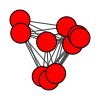

In [2]:
g = ig.Graph()

g.add_vertices(3)
g.add_edges([(0,1), (1,2)])
# g.vs[0]['name'] = 'test'
# g.vs[0].attributes()

# print(g)
ig.summary(g)

g =ig.Graph.GRG(10, .8)

ig.plot(g, bbox=(100,100))

Clustering with 10 elements and 8 clusters
[0] 0
[1] 1, 2, 7
[2] 3
[3] 4
[4] 5
[5] 6
[6] 8
[7] 9


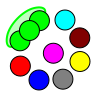

In [3]:
random.seed(42)


# a random graph
g = ig.Graph.Erdos_Renyi(10,.02)

# detect communities
comms = g.community_multilevel()

# plot and save
g_plot = ig.plot(comms, mark_groups = True, inline=True, bbox=(100,100))

# g_plot.save('outputs/multilevel_community_in_graphs.png')

print(comms)
g_plot


/Users/morteza/workspace/cogtext


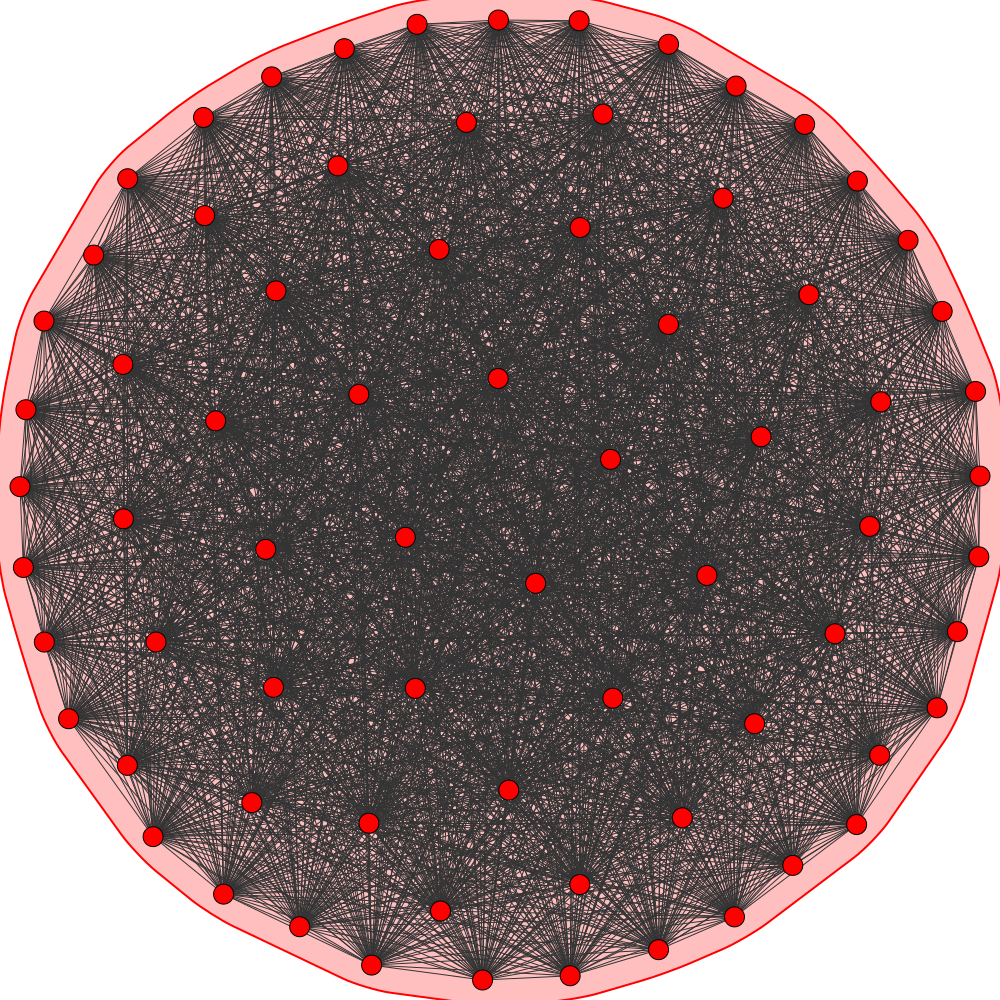

In [6]:

H = pd.read_csv('models/cogtext/H_USEv4_UMAP5d_v1.csv.gz', index_col=['category', 'label'])
H_sim = get_similarity_matrix(H, pivot_by_category=True)

constructs_affinity = pd.DataFrame(cosine_similarity(H_sim), index=H_sim.index, columns=H_sim.index)

G = ig.Graph.Weighted_Adjacency(constructs_affinity.values, mode='UNDIRECTED', loops=False)

# G.simplify(multiple=True, loops=True)

# detect communities
comms = G.community_multilevel()

# plot and save
ig.plot(comms, mark_groups = True, inline=True, bbox=(1000,1000))


In [1]:
import hypernetx as hnx
import hypernetx.algorithms.hypergraph_modularity as hmod

# H = hnx.Hypergraph.from_dataframe(H_sim)

H2 = H_sim.unstack().to_frame()
H2.index.names = ['construct', 'task']
H2.columns = ['weight']
# H2 = H2.query('weight > .9').reset_index()
H2 = H2.pivot(columns='construct', index='task')
H2.columns = [col[1] for col in H2.columns]
H2.index.name=None
H2
HG = hnx.Hypergraph.from_dataframe(H2.T)
hnx.draw_two_column(HG)


NameError: name 'H_sim' is not defined

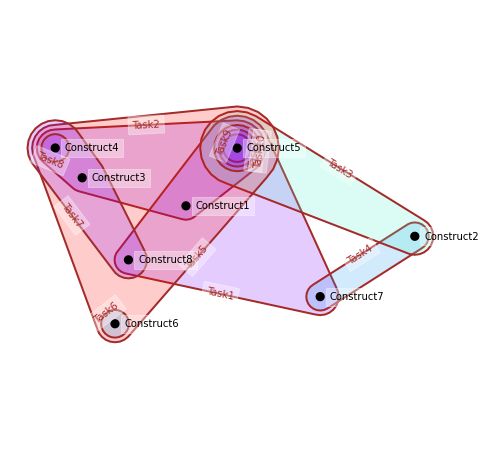

In [8]:
communities = {
    'Construct1': ('Task1', 'Task2'),
    'Construct2': ('Task3', 'Task4'),
    'Construct3': ('Task5', 'Task2', 'Task7'),
    'Construct4': ('Task5', 'Task2', 'Task7', 'Task8'),
    'Construct5': ('Task5', 'Task1', 'Task2', 'Task9', 'Task3', 'Task10', 'Task11'),
    'Construct6': ('Task5', 'Task6'),
    'Construct7': ('Task1', 'Task4'),
    'Construct8': ('Task1', 'Task7')
}


H = hnx.Hypergraph(communities)

# face colors
cmap = plt.cm.rainbow
edge_sizes = np.array([len(e) for e in H.edges()])
norm = plt.Normalize(edge_sizes.min(), edge_sizes.max())
facecolors = cmap([norm(c) for c in edge_sizes]) * (1, 1, 1, 0.2)

hnx.draw(H.dual(),
        edges_kwargs={
            'linewidths': 2,
            'edgecolors': 'brown',
            'facecolors': facecolors
        },
         nodes_kwargs={
    # 'node_size': [np.random.randint(3,5) for n in H.collapse_nodes()]
})

# hnx.draw(H.dual())

plt.show()

In [50]:
# editor
HypernetxWidget(HG)

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'AnalogyMakingTask'}, {'uid': 'RecentPro…

In [16]:
%reload_ext watermark
# %watermark
%watermark -iv

igraph    : 0.9.8
sys       : 3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:50:56) 
[Clang 11.1.0 ]
hnxwidget : 0.1.1b1
hypernetx : 1.2
numpy     : 1.20.3
matplotlib: 3.4.3
pandas    : 1.3.4
sklearn   : 1.0.1

